In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv("after_cleaning_autos_file.csv")


In [12]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,Privat,Angebot,480,Test,Limousine,1993,Manuell,0,Golf,150000,3,Benzin,Volkswagen,Nein,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_sportback_2.7_tdi,Privat,Angebot,18300,Test,Coupe,2011,Manuell,190,A4,125000,5,Diesel,Audi,Ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_grand_cherokee_""overland""",Privat,Angebot,9800,Test,Suv,2004,Automatik,163,Grand,125000,8,Diesel,Jeep,Nein,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,Golf_4_1_4__3türer,Privat,Angebot,1500,Test,Kleinwagen,2001,Manuell,75,Golf,150000,6,Benzin,Volkswagen,Nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_fabia_1.4_tdi_pd_classic,Privat,Angebot,3600,Test,Kleinwagen,2008,Manuell,69,Fabia,90000,7,Diesel,Skoda,Nein,2016-03-31,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367537,2016-03-21 09:50:58,Mitsubishi_cold,Privat,Angebot,0,Control,Limousine,2005,Manuell,0,Colt,150000,7,Benzin,Mitsubishi,Ja,2016-03-21,0,2694,2016-03-21 10:42:49
367538,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Privat,Angebot,1199,Test,Cabrio,2000,Automatik,101,Fortwo,125000,3,Benzin,Smart,Nein,2016-03-05,0,26135,2016-03-11 18:17:12
367539,2016-03-19 18:57:12,Volkswagen_multivan_t4_tdi_7dc_uy2,Privat,Angebot,9200,Test,Bus,1996,Manuell,102,Transporter,150000,3,Diesel,Volkswagen,Nein,2016-03-19,0,87439,2016-04-07 07:15:26
367540,2016-03-20 19:41:08,Vw_golf_kombi_1_9l_tdi,Privat,Angebot,3400,Test,Kombi,2002,Manuell,100,Golf,150000,6,Diesel,Volkswagen,Nein,2016-03-20,0,40764,2016-03-24 12:45:21


#### 1) The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

/*Here are several techniques to reduce the memory usage of a dataset:

Choose Appropriate Data Types:

   - Use more memory-efficient data types (e.g., using int32 instead of int64, float32 instead of float64) for numerical columns to store data efficiently.
       
Downcast Numeric Columns:

   - Downcast numeric columns using Pandas to reduce memory usage.
   - df = df.apply(pd.to_numeric, downcast='integer')
Convert Categorical Data:

  - Convert categorical variables to the Pandas category data type, which can significantly reduce memory usage.
  - df['category_column'] = df['category_column'].astype('category')
  
Remove Unnecessary Columns:

  - Drop columns that are not necessary for analysis to reduce the overall memory footprint.
Use File Compression Formats:

  - Use more memory-efficient file formats such as Parquet, Feather, or HDF5, which can store data more efficiently compared to CSV or Excel files.
  
Load Data in Chunks:

  - Process data in chunks using Pandas' chunksize parameter while reading large datasets to reduce memory usage.
Use External Libraries:

  - Libraries like Dask can handle larger-than-memory datasets by performing operations on smaller chunks of data.
Optimize Text Data:

  - Optimize text data by removing unnecessary characters or using tokenization, especially for free-text fields.
Use Sparse Data Structures:

   - For datasets with lots of zeros, consider using sparse data structures to save memory.
Clean Data and Remove Duplicates:

   - Cleaning data can eliminate unnecessary or duplicate records, reducing overall memory usage.
-- Write the reduced-memory DataFrame to a new file

df.to_parquet('reduced_memory_data.parquet')*/

#### What is the Average price of vehicle by fuel type and gearbox type.Give a plot


In [13]:
gby = df.groupby(["fuelType","gearbox"])[["price"]].mean()
gby1=gby.reset_index()

<Axes: xlabel='price', ylabel='fuelType'>

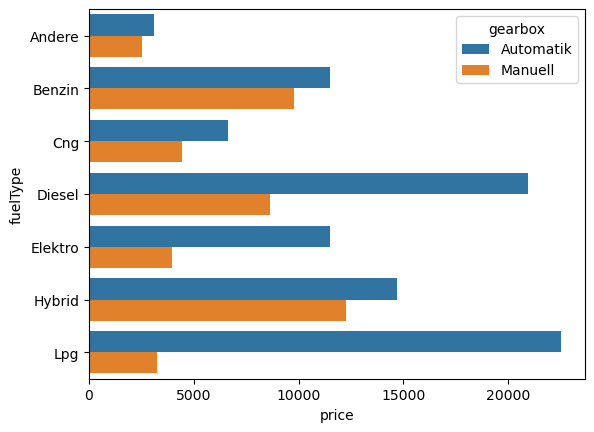

In [14]:
sns.barplot(x="price",y="fuelType",hue="gearbox",data=gby1)

#### 3) What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot


In [15]:
gby = df.groupby(["vehicleType","gearbox"])[["powerPS"]].mean()
gby2=gby.reset_index()

<Axes: xlabel='vehicleType', ylabel='powerPS'>

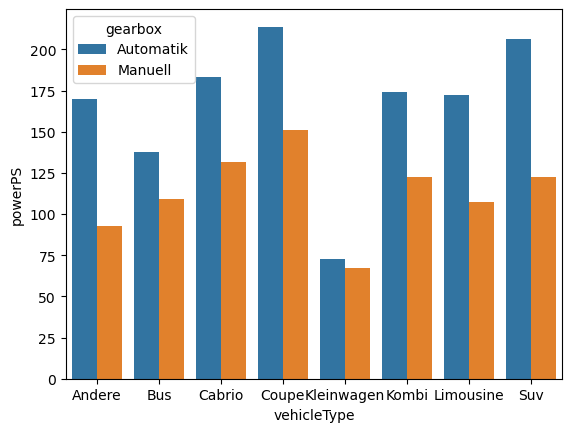

In [16]:
sns.barplot(y="powerPS",x="vehicleType",hue="gearbox",data=gby2)

#### 4) What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this


In [31]:
piy=df.pivot_table(columns="vehicleType",index="brand",values="price")
piy=piy.reset_index()

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(piy,annot=True,fmt=".2f")


ValueError: could not convert string to float: 'Alfa_romeo'

<Figure size 1000x1000 with 0 Axes>

<Axes: xlabel='vehicleType', ylabel='brand'>

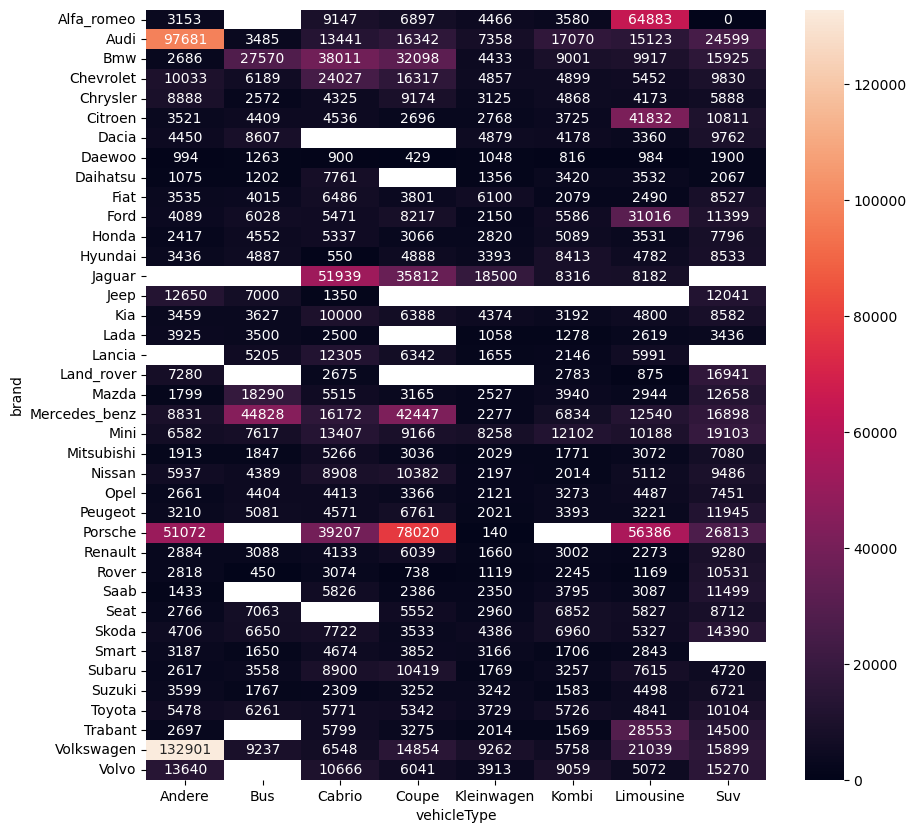

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.crosstab(df['brand'], df['vehicleType'], values=df['price'], aggfunc='mean'), annot=True, fmt='.0f')

In [24]:
df["brand"].unique()

array(['Volkswagen', 'Audi', 'Jeep', 'Skoda', 'Bmw', 'Peugeot', 'Ford',
       'Mazda', 'Nissan', 'Renault', 'Mercedes_benz', 'Opel', 'Seat',
       'Citroen', 'Honda', 'Fiat', 'Mini', 'Smart', 'Hyundai',
       'Alfa_romeo', 'Subaru', 'Volvo', 'Mitsubishi', 'Kia', 'Suzuki',
       'Lancia', 'Porsche', 'Toyota', 'Chevrolet', 'Dacia', 'Daihatsu',
       'Trabant', 'Saab', 'Chrysler', 'Jaguar', 'Daewoo', 'Rover',
       'Land_rover', 'Lada'], dtype=object)

In [25]:
df["vehicleType"].unique()

array(['Limousine', 'Coupe', 'Suv', 'Kleinwagen', 'Cabrio', 'Bus',
       'Kombi', 'Andere'], dtype=object)

0

In [28]:
df["brand"].isnull().sum()

0

In [29]:
df["price"].isnull().sum()

0

In [33]:
avg_price = df.groupby(['brand', 'vehicleType'])['price'].mean().reset_index()
pivot_table = avg_price.pivot('brand', 'vehicleType', 'price')

C:\Users\Welcome\AppData\Local\Temp\ipykernel_21076\1986826434.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = avg_price.pivot('brand', 'vehicleType', 'price')


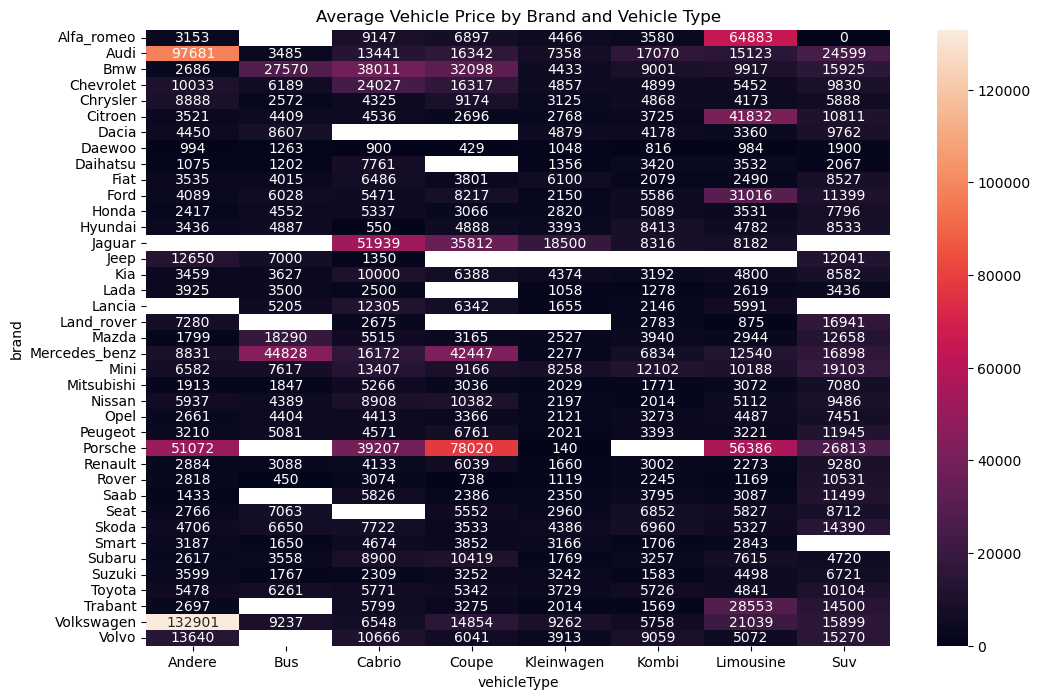

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f")
plt.title('Average Vehicle Price by Brand and Vehicle Type')
plt.show()





